In [ ]:
# Imports standards
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: model selection
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    learning_curve,
    train_test_split,
    validation_curve,
)

# Scikit-learn: preprocessing
from sklearn.preprocessing import (
    Binarizer,
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    RobustScaler,
    StandardScaler,
)

# Scikit-learn: pipeline & composition
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_selector, make_column_transformer

# Scikit-learn: imputation
from sklearn.impute import SimpleImputer

# Scikit-learn: feature selection
from sklearn.feature_selection import (
    RFECV,
    RFE,
    SelectFromModel,
    SelectKBest,
    VarianceThreshold,
    chi2,
)

# Scikit-learn: models
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    IsolationForest,
    RandomForestClassifier,
    StackingClassifier,
    VotingClassifier,
)

# Scikit-learn: decomposition
from sklearn.decomposition import PCA

# Scikit-learn: metrics
from sklearn.metrics import (
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
)

### 1) EDA

In [2]:
#Importe le dataset covid 19 et affichage des données du dataset
data = pd.read_csv("../data/covid-19.csv", encoding="latin1")
print(data.shape)
display(data.describe())
display(data)


print(f"positive {data['SARS-Cov-2 exam result'].value_counts()}")

Nan_columns = data.columns[data.isna().sum() > data.shape[0] - 558]
print([data.columns.get_loc(name_col) + 1 for name_col in Nan_columns])
data.iloc[:, 7].isna().sum()

(5644, 111)


,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416944e-09,-7.863787e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


positive SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64
[21, 28, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]


5041

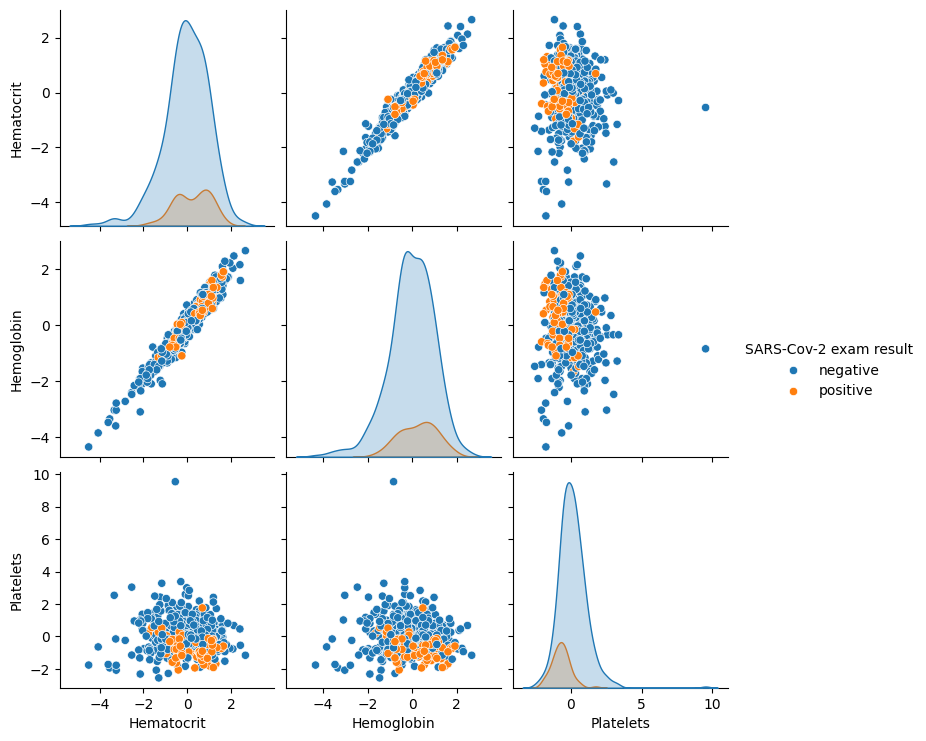

In [4]:
cols = ["SARS-Cov-2 exam result", "Hematocrit", "Hemoglobin", "Platelets"]
sns.pairplot(data[cols], hue="SARS-Cov-2 exam result")